# "Veri Defteri Ben Seviyor Çok"

Yağmurlu bir pazar sabahında evdeyim. Aslında okumam gereken birkaç makale var. Gel gör ki canım onlara bakmak istemiyor. Açıkçası **Veri Defteri**'ne bir yazı hazırlamak çok daha cazip. Hele eğlenceli bir konu bulursam güle-oynaya yazarım diyorum.

İnternette dolaşırken eğlenceli konunun âlâsını buldum. Bir grup arkadaş *Yıldız Savaşları* filmlerinin verisini internete koymuş. Resmen amme hizmeti. Hatta bir de [uygulama ara yüzü](https://swapi.co/) (API: *application programming interface*) hazırlamışlar. Yani  internet sorguları ile veriyi çekmek mümkün. Üstelik bu servisi kullanmak için doğrulama (*authentication*) kaydına da ihtiyaç yok. Gerçekten tam oynamalık bir sayfa olmuş.

Ara yüz için detaylı açıklamayı [şu sayfada](https://swapi.co/documentation) bulabilirsiniz. Hızlıca özetlemem gerekirse, bu servisten tüm *Yıldız Savaşları* filmlerinde yer alan karakterlerin, gezegenlerin, türlerin, uzay gemilerinin ve araçların bilgilerine ulaşabiliyorsunuz. Servis veriyi, kullanması oldukça kolay olan JSON formatında veriyor. Bu noktayı biraz açayım. JSON formatında bir veri, iç içe geçmiş süslü parantezlerin yardımıyla bir ağaç yapısında saklanıyor. Örneğin bizim sayfanın künyesini şu yapıda verilen alanlarda tutmak istediğimizi düşünelim:

* İsim
* Tarih
* Konular
 - Teknik
 - Uygulama

Sıraladığım bu alan isimlerine anahtar (*key*) deniyor. JSON formatında veri *anahtar:değer* ikilileri şeklinde tutuluyor. İç içe geçmiş anahtarların süslü parantezler ile ayrılmasıyla da alt alanlara geçiliyor. Gördüğünüz gibi JSON formatı Python'daki sözlük (*dictionary*) yapısıyla bire bir örtüşüyor. Sözlükler konusunda [Kaan'ın yazısına](http://www.veridefteri.com/2017/12/11/python-programlamaya-giris-sayilar-aritmetik-temel-veri-yapilari/) bir göz atabilirsiniz. JSON formatındaki bir veriyi sözlük değişkenine dönüştürmek içinse farklı paketlerin kendi fonksiyonları mevcut. Bu formatı ve dönüştürme işlemini anlatmak için ufak bir örnek açıklayıcı olur. Örnekteki basit JSON verisini işlerken <span style="color:darkgreen; font-family:Courier">json</span> paketini kullanacağım.

In [1]:
import json

# JSON formatındaki veri
json_metin = '''
{
    "isim": "Veri",
    "soyad": "Defteri",
    "tarih": 2017,
    "konular": {
        "teknik": ["yapay zeka", "optimizasyon"],
        "uygulama": ["metin analizi", "hesaplama"]
        }
}
'''

# Sözlüğe çevirelim
sozluk = json.loads(json_metin)
print('Dönüştürdükten sonra değişkenin tipi:', type(sozluk))

# İlk alan
print(sozluk["tarih"])
# Alt alan
print(sozluk['konular']['teknik'][1])

Dönüştürdükten sonra değişkenin tipi: <class 'dict'>
2017
optimizasyon


Bu önemli ama sıkıcı konuyu geride bıraktıktan sonra *Yıldız Savaşları* analizine başlayabiliriz. Uygulama ara yüzünden veriyi çekmek için <span style="color:darkgreen; font-family:Courier">requests</span> paketinin sağladığı <span style="color:darkgreen; font-family:Courier">get</span> fonksiyonunu kullanacağız.

In [2]:
from requests import get

adres = 'http://swapi.co/api'

# Sözlük formatına çevirmek için .json() fonksiyonunu kullandık
get(adres).json()

{'films': 'https://swapi.co/api/films/',
 'people': 'https://swapi.co/api/people/',
 'planets': 'https://swapi.co/api/planets/',
 'species': 'https://swapi.co/api/species/',
 'starships': 'https://swapi.co/api/starships/',
 'vehicles': 'https://swapi.co/api/vehicles/'}

Evet, ara yüz bilgileri bu alanlarda veriyor. İlk alandaki filmler ile başlayalım.

In [3]:
# Yıldız Savaşları Filmleri
ys_filmler = get(adres+'/films/').json()

# Sözlüğün anahtarları
print(ys_filmler.keys())

# İlk anahtar film sayısını veriyor
film_sayi = ys_filmler['count']
print('Toplam film sayısı: ', film_sayi, '\n')

# Film sonuçlarını alalım
sonuclar = ys_filmler['results']

# Filmler kronolojik sırada değiller
for f in range(film_sayi):
    print(f+1,'...', 'Yıl:', sonuclar[f]['release_date'], 
          '-- Bölüm:', sonuclar[f]['episode_id'])

kron_sira = [1, 6, 5, 3, 2, 4, 7]
print('\nKronolojik sıra: ', kron_sira)

dict_keys(['count', 'next', 'previous', 'results'])
Toplam film sayısı:  7 

1 ... Yıl: 1977-05-25 -- Bölüm: 4
2 ... Yıl: 2002-05-16 -- Bölüm: 2
3 ... Yıl: 1999-05-19 -- Bölüm: 1
4 ... Yıl: 2005-05-19 -- Bölüm: 3
5 ... Yıl: 1983-05-25 -- Bölüm: 6
6 ... Yıl: 1980-05-17 -- Bölüm: 5
7 ... Yıl: 2015-12-11 -- Bölüm: 7

Kronolojik sıra:  [1, 6, 5, 3, 2, 4, 7]


Kronolojik sırayı özellikle çıkarmak istedim. Eğer tüm seriyi izlemek isterseniz, bazılarının tavsiye ettiği sıra da bu. Bu arada her filmin açılışındaki kayan yazıyı da kaydetmişler. Harika! Valla şunu yapmasam içimde kalırdı.

In [4]:
from random import randint
from time import sleep

# Rassal olarak bir film seçelim
film = randint(0,6)

# Açılış yazısı
print('\n**** YILDIZ SAVAŞLARI', sonuclar[film]['episode_id'], '****\n')
akan_yazi = sonuclar[film]['opening_crawl'].split('\n')
for satir in akan_yazi:
    print(satir)
    sleep(1) # Bir saniye bekletelim


**** YILDIZ SAVAŞLARI 4 ****

It is a period of civil war.
Rebel spaceships, striking
from a hidden base, have won
their first victory against
the evil Galactic Empire.

During the battle, Rebel
spies managed to steal secret
plans to the Empire's
ultimate weapon, the DEATH
STAR, an armored space
station with enough power
to destroy an entire planet.

Pursued by the Empire's
sinister agents, Princess
Leia races home aboard her
starship, custodian of the
stolen plans that can save her
people and restore
freedom to the galaxy....


Biraz da istatistik toplayalım. Bakalım hangi filmde ne kadar karakter, gezegen, vb. kullanılmış.

In [6]:
import numpy as np

# Veriyi iki boyutlu bir tabloda tutalım
film_istat = np.zeros((film_sayi,5))

# Kullanacağımız bilgiler
bilgiler = ['characters', 'planets', 
            'starships', 'vehicles', 
            'species']

# Tabloyu doldurma
for f in range(film_sayi):
    for j, b in enumerate(bilgiler):
        film_istat[f, j] = len(sonuclar[f][b])

Sayma işlemi tamam. Bir de görselleştirelim. 

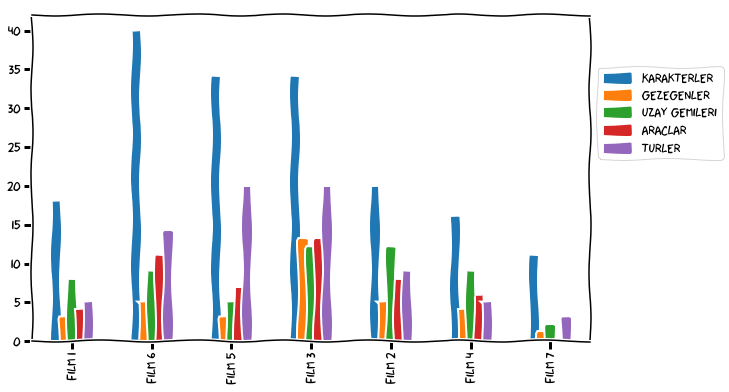

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

indeks = ['Film '+ str(f) for f in kron_sira]
kolonlar = ['Karakterler', 'Gezegenler', 
            'Uzay Gemileri', 'Araclar', 
            'Turler']

df = pd.DataFrame(film_istat, index=indeks,
                  columns=pd.Index(kolonlar))

# XKCD formatı eğlenceli olur
plt.xkcd()

# Lejantı şeklin dışına alalım
df.plot(kind='bar', figsize=(10,6)).legend(loc='center left', 
                                       bbox_to_anchor=(1.0, 0.7));

En çok karakter altıncı filmde yer almış. Üçüncü filmde de bir sürü uzay gemisi, tür, araç ve gezegen varmış. Serinin ilkini, yani dördüncü filmi, hatırlarsınız belki. Hani Han Solo uzayda fink atıyor, Luke Skywalker da savaştan savaşa koşuyordu. R2-D2 ve C-3PO isimli iki sevimli robot ile o bölümde tanışmıştık. Tam 40 yıl olmuş! 

Karakterlerden bahis açılmışken kim, hangi filmde oynadı bakmak istiyorum. Tüm karakterler çok olur. Neyse ki ara yüz, insanlar (people) adresinden 10 kişiyi veriyor. Arasında tanıdıklar da var. Önce bir karakter-film tablosu oluşturayım. Bu tabloda her satır bir karakter bilgisini içerecek. Eğer o karakter bir filmde oynadı ise o filme karşılık gelen kolondaki değeri bir, aksi halde sıfır yapacağım. 

Bu veriyi hazırladıktan sonra dairesel bir şekil çizmek istiyorum. Böyle bir iş içinse R kullanmaya karar verdim. Bunun iki sebebi var: (1) Veri biliminde birden fazla dili karıştırarak çalışmak çok yaygın. (2) Görselleştirme söz konusu olunca R'ın bir adım önde olduğunu düşünüyorum. Madem görsel için R kullanacağım, tabloyu bir metin dosyasına yazayım. Tablodaki değerleri virgülle ayırarak bir metin dosyasına kaydedeceğim. Bu formattaki dosyaların uzantıları .csv oluyor (csv: *comma separated values*). Bu tür dosyalarla çalışmak için <span style="color:darkgreen; font-family:Courier">csv</span> paketini kullanabiliriz.

In [8]:
import csv

# Karakterler verisini çekelim
karakterler = get(adres+'/people/').json()
sonuclar = karakterler['results']
karakter_say = len(sonuclar)

# Virgüller ile ayırarak 'karakter_film.csv' dosyasına yazalım
with open('karakter_film.csv', 'w') as dosya:
    yazici = csv.writer(dosya)
    for i in range(karakter_say):
        satir = ['', 0, 0, 0, 0, 0, 0, 0]
        isim = sonuclar[i]['name'].split()
        satir[0] = isim[0]
        film_say = len(sonuclar[i]['films'])
        for f in range(film_say):
            film_no = sonuclar[i]['films'][f][27:-1]
            satir[int(film_no)] = 1
        yazici.writerow(satir)

R ile çizmeden önce dosyanın içeriğine bir göz atalım.

In [9]:
%cat karakter_film.csv

Evet hazırız. Şimdi Jupyter Notebook içinden R betiği (*script*) çalıştıracağız. Bu betik şekli bir dosyaya yazmalı. Sonra o şekli defterin içinde gösteririz. Kısacası şu üç adımı takip etmemiz yeterli:

1. R betiğini [IPython sihirli ifadeleri](http://www.veridefteri.com/2017/11/28/ipython-sihirli-ifadeler/) ile bir dosyaya yazdırma. 
2. Komut satırından R ile yazdırdığımız betiği çalıştırma (komut satırından R çalıştırabildiğinize dikkat edin).
3. R betiğinin çıktı olarak verdiği şekil dosyasını bu defterin içinde gösterme.

R betiğinde <span style="color:darkgreen; font-family:Courier">circlize</span> paketini kullanacağım. Eğer sizde bu paket kurulu değilse öncelikle R komut satırına şunu yazmanız gerek:

```R
install.packages("circlize")
```

Evet, birinci adım ile başlayalım. R betiğini dosyaya yazıyoruz.

In [10]:
%%writefile ys.r
library(circlize)
dat <- read.csv('./karakter_film.csv', header=FALSE, sep=',', row.names=1)
colnames(dat) <- paste('Film ', c(1:7), sep='')
# Grafikte isimler sığdırmak için satırları rassal seçiyoruz
dat <- dat[sample(c(1:10)),]
png(filename="ys.png", width=600, height=600)
chordDiagram(as.matrix(dat), transparency = 0.5);
dev.off()

Writing ys.r


İkinci adım R betiğini komut satırından çalıştırma. Çalıştırdıktan sonra betiği silebiliriz.

In [11]:
# Hazırladığımız R dosyasını çalıştıralım
!Rscript ys.r

# İşimiz bittiği için silebiliriz
!rm ys.r

circlize version 0.4.2
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: http://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization 
  in R. Bioinformatics 2014.

null device 
          1 


Ve son adım: Kaydettiğimiz resmi, defterin içinde gösterme.

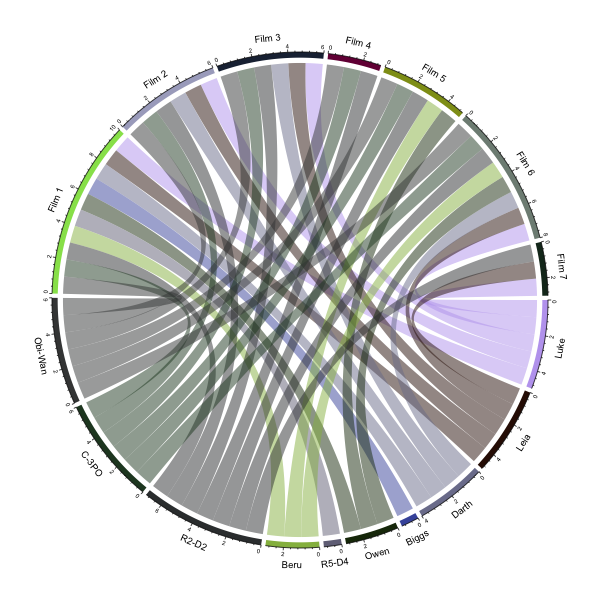

In [12]:
from IPython.display import Image
Image("ys.png")

Baksanıza R2-D2 bütün filmlerde oynamış. Belli ki asıl yıldız o. Neyse, yağmurlu bir pazar günü için iyi eğlence oldu. Biraz kurcalasanız kim bilir siz neler yaparsınız? Haydi kolları sıvayın. Güç sizinle olsun!

<img src="https://raw.githubusercontent.com/sibirbil/VeriDefteri/master/Veri_Defteri_Ben_Seviyor_Cok/sekil/isinkilici.png", width=600>

---
Bu yazıdaki kodları deneyebileceğiniz deftere [GitHub adresimizden](https://github.com/sibirbil/VeriDefteri/) erişebilirsiniz.